# Interpolación

Dados $n+1$ puntos $x_0,x_1,\dots,x_n$ el objetivo es construir una función $f(x)$ tal que $f(x_i) = y_i$ con $y_i$ conocido $\forall i=0,1,\dots,n$.

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=0B66Kmqpqr3IQa1QzdGNZRzVab1JFdDlScXpzdjluV1I5cldN" alt="a" heigth="300" width="300">
</p>

Entre las aplicaciones en interpolación se encuentran:

* Reconstrucción de funciones.
* Aproximación a derivadas e integrales.
* Estimación de funciones en cantidades no conocidas.

## Modelo en interpolación

Típicamente el modelo $f$ es de la forma $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$ con $\phi_j:\mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas y $w_j$ parámetros desconocidos por determinar $\forall j=0,1,\dots,n$.

**Obs:**

* Comúnmente las $\phi_j$'s son funciones polinomiales, trigonométricas, racionales y exponenciales.
* La notación $f(x|w)$ se utiliza para denotar que $w$ es un vector de parámetros a estimar.

## ¿Cómo ajustar el modelo anterior?

El problema de interpolación conduce a plantear y posteriormente resolver un sistema de ecuaciones lineales de la forma $Aw = y$ pues $f(x_i|w_i) = y_i$, $\forall i=0,1,\dots,n$ con $A \in \mathbb{R}^{{n+1}x{n+1}}$, $w,y \in \mathbb{R}^{n+1}$ definidas como sigue:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)
\end{array}
\right],
w=
\left[\begin{array}{c}
w_0\\
w_1\\
\vdots \\
w_n
\end{array}
\right] ,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_n
\end{array}
\right]
$$

Esto es, hay que resolver: $$\begin{array}{ccc} \phi_0(x_0)w_0 + \phi_1(x_0)w_1 + \cdots + \phi_n(x_0)w_n  &= & y_0 \\ \phi_0(x_1)w_0 + \phi_1(x_1)w_1 + \cdots + \phi_n(x_1)w_n  &= & y_1\\ \vdots & & \\ \phi_0(x_n)w_0 + \phi_1(x_n)w_1 + \cdots + \phi_n(x_n)w_n  &= & y_n \end{array}$$ 

que es la condición de  interpolación $f(x_i|w) = y_i \forall i=0,1,\dots,n$ bajo el modelo: $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$.

## Interpolación polinomial: funciones $\phi_j$'s son polinomios

### En numpy ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

Supongamos que queremos realizar la interpolación a los siguientes puntos:

In [2]:
#array pseudo aleatorio
np.random.seed(2000) #para reproducibilidad
npoints = 6
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

'x:'
array([11.73673761, 11.89791391,  7.89322658,  9.85108791, 10.58306155,
        7.74076697])
'y:'
array([ -9.86276046, -10.70121322, -10.62078008, -10.47961976,
        -8.79026123, -11.07518386])


ver: [numpy.random.randn](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn)

#### Los datos ejemplo

Text(0.5, 1.0, 'Puntos ejemplo')

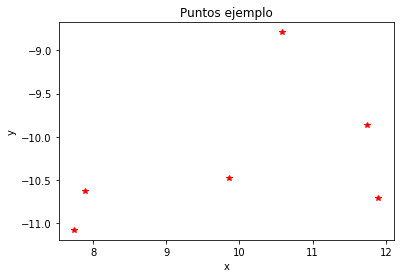

In [3]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar lo anterior: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

In [4]:
# el tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
#Como tenemos npoints = 6 puntos, entonces debemos generar un polinomio de grado 5
ngrado = npoints -1
coeficientes = np.polyfit(x,y,ngrado)

In [5]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
pprint.pprint(coeficientes)

array([ 8.16e-02, -4.26e+00,  8.78e+01, -8.95e+02,  4.50e+03, -8.98e+03])


Entonces nuestro polinomio es: $$p_{npoints}(x) = .0816x^5 -4.26x^4 +87.8x^3-895x^2+4500x-8980$$

#### La gráfica

Ahora nos gustaría graficarlo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos evaluar $p_{npoints}(x)$ en diferentes valores de $x$. Para esto, generamos un numpy array con un número de puntos $neval$:

In [6]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coeficientes,xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


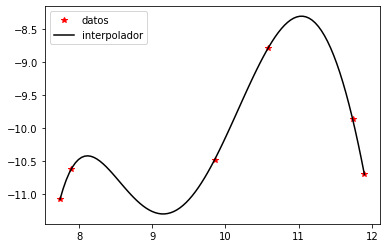

In [7]:
plt.plot(x, y, 'r*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')

In [8]:
max(yeval)

-8.30968311551078

Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación calcularíamos:

In [9]:
np.polyval(coeficientes, 8.5)

-10.740611757826628

### Problema con: número de puntos y la interpolación polinomial

Si incrementamos a 9 puntos por los que deseamos hacer pasar un interpolador tenemos:

In [10]:
#array pseudo aleatorio
np.random.seed(2000) #para reproducibilidad
npoints = 9
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

'x:'
array([11.74, 11.9 ,  7.89,  9.85, 10.58,  7.74, 10.14,  9.3 ,  9.38])
'y:'
array([-10.48,  -8.79, -11.08,  -9.19, -10.29, -10.22, -10.17,  -8.9 ,
        -9.92])


#### Los datos

Text(0.5, 1.0, 'Puntos ejemplo')

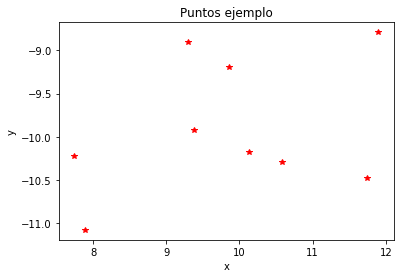

In [11]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

In [12]:
ngrado = npoints -1
coeficientes_nuevos = np.polyfit(x,y,ngrado)
pprint.pprint(coeficientes_nuevos)

array([ 2.55e+00, -2.01e+02,  6.94e+03, -1.36e+05,  1.66e+06, -1.30e+07,
        6.31e+07, -1.75e+08,  2.11e+08])


Nuestro polinomio ahora es: $$p_{npoints}(x) = 2.55x^8 -201x^7 + 6940x^6-1.36*10^5x^5+1.66*10^6x^4-1.3*10^7x^3 +6.31*10^7x^2-1.75*10^8x+2.11*10^8$$

#### La gráfica

In [13]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coeficientes_nuevos,xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


Obsérvese la oscilación que debe tener el polinomio de grado $9$ para pasar por los $10$ puntos:

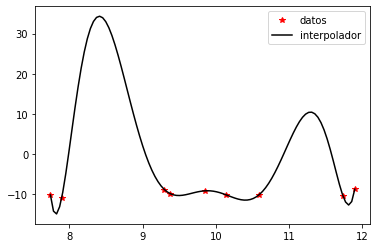

In [14]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')

In [15]:
max(yeval)

34.327245980501175

Este tipo de oscilación es típica al tener un polinomio mayor o igual a $6$ (más de $7$ puntos). Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación sería errórena:

In [16]:
np.polyval(coeficientes_nuevos,8.5)

32.875958532094955

lo cual es erróneo.

##### Nota

Los interpoladores obtenidos con alguno de los métodos anteriores se utilizan para estimar cantidades en el intervalo con el que fueron construídos. Si deseamos estimar fuera del intervalo debe de realizarse con cuidado pues se pueden tener estimaciones incorrectas.

In [17]:
np.polyval(coeficientes, 15)

35.302850723801384

In [18]:
np.polyval(coeficientes_nuevos, 15)

867306.9197259247

### Polinomios piecewise

Para arreglar la oscilación de interpoladores de grado alto, una solución es interpolar con polinomios de grado bajo en cada subintervalo compuesto por las $x$'s, esto es, una forma *piecewise*. En python se realiza con el método `interpolate` del paquete `scipy`:

#### Lineal

In [19]:
from scipy.interpolate import interp1d

In [20]:
pw_l = interp1d(x, y) #linear piecewise 

In [21]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_l(xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


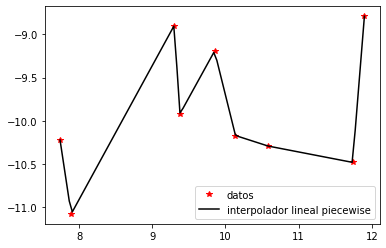

In [22]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador lineal piecewise'], loc='best')

Aunque se ha resuelto la estimación:

In [23]:
pw_l(8.5)

array(-10.14)

#### Splines

Los *splines* cúbicos piecewise resuelven la no diferenciabilidad del interpolador lineal en los puntos dados:

In [24]:
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_spline(xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


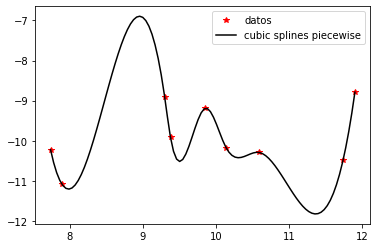

In [25]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')

In [26]:
pw_spline(8.5)

array(-8.86)

Ver: [Interpolation (scipy.interpolate)](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

**Ejercicio: Interpolar con 10 puntos generados de la función de [Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.**